In [1]:
> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

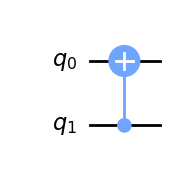

In [2]:
from qiskit import Aer, QuantumCircuit, execute
qc = QuantumCircuit(2)
qc.cx(1,0)
qc.draw(output='mpl')

In [3]:
from qiskit import Aer, execute
U_simulator = Aer.get_backend('unitary_simulator')

job = execute(qc, backend = U_simulator)
CNOT_matrix = job.result().get_unitary()

#print(U_matrix)
from qiskit.tools.visualization import array_to_latex
array_to_latex(CNOT_matrix, prefix="\\text{CNOT = }\n")

<IPython.core.display.Latex object>

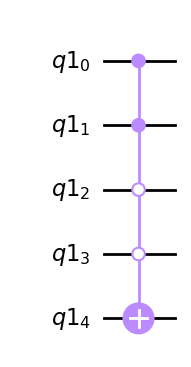

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import SwapGate, XGate

qr = QuantumRegister(5)

qc = QuantumCircuit(qr)

gateMCX = XGate().control(4,ctrl_state= 3) # puerta X 4-veces controlada
gateMCSWAP = SwapGate().control(3,ctrl_state= 4) # puerta SWAP 3 veces controlada


qc.append(gateMCX,[0,1,2,3,4])    
#qc.append(gateMCSWAP,[0,1,2,3,4])    


qc.draw('mpl')

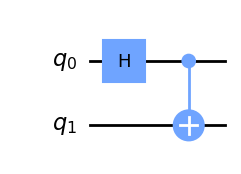

<IPython.core.display.Latex object>

In [5]:
from qiskit import Aer, QuantumCircuit, execute
' create the circuit '
qc = QuantumCircuit(2,0)    
#qc.x(0)
#qc.x(1)

qc.h(0)
qc.cx(0,1)
display(qc.draw('mpl'))


' execute in mode statevector_simulator '
S_simulator = Aer.get_backend('statevector_simulator')
Bell_state = execute(qc,S_simulator).result().get_statevector(decimals=5)


from qiskit.quantum_info import Statevector
Statevector(Bell_state).draw('latex')

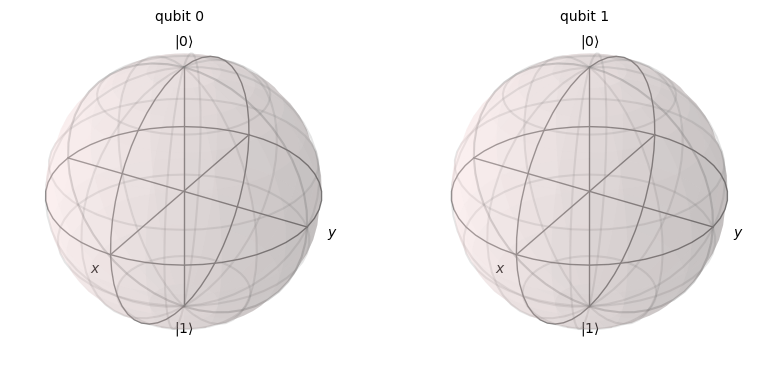

In [6]:
' the Bell state cannot be drawn on Bloch spheres'
Statevector(Bell_state).draw('Bloch')